In [1]:
#Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

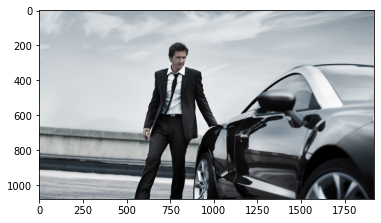

In [4]:
filename = "man_tuxedo_car_style_image.jpg"
img = read_file(filename)

# Create Edge Mask

In [5]:
def edge_mask(img, line_size, blur_value):
    """
    Input : Input Image
    Output : Edges of Image
    """
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)

    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C
    ,cv2.THRESH_BINARY,line_size,blur_value)

    return edges


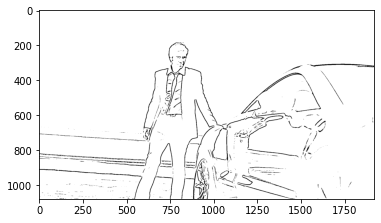

In [6]:
line_size = 7
blur_value = 7
edges = edge_mask(img,line_size,blur_value)

plt.imshow(edges, cmap = "gray")
plt.show()

# Reduce the Color Palette

In [8]:
def color_quantization(img, k):
    #Transform the image
    data = np.float32(img).reshape((-1,3))

    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    #Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

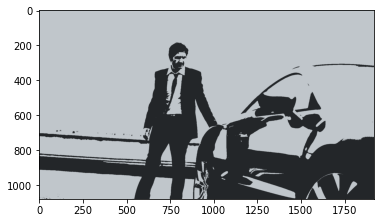

In [10]:
img_quantized = color_quantization(img,k = 2) #Getting the dominant k colors in the image

plt.imshow(img)
plt.show()

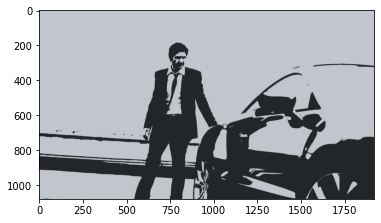

In [11]:
#Reduce the Noise

blurred = cv2.bilateralFilter(img,d = 7, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with the Quantized Image

In [14]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred, mask = edges)

    plt.imshow(c)
    plt.show()

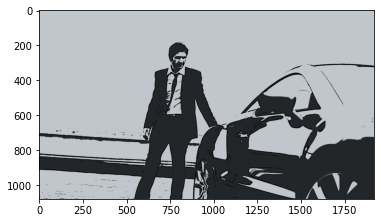

In [15]:
cartoon()